#### CUNY DATA620 -- Zachary Herold -- Assignment "Hello Graph World"

In this beachhead program, I create the nodes and edges for a basic graph using networkx. First, I load the Krackhardt Kite Graph using the generators.small module, then I draw it from scratch with the females removed.

In [8]:
#Loading the basics and setting graphs inline formatting.
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [4]:
G = nx.generators.small.krackhardt_kite_graph()
#https://networkx.github.io/documentation/networkx-2.0/reference/generators.html

I change the numeric node names to the actual names using the relabel_nodes method, which takes a mapping dictionary. 

In [35]:
mapping={0: "Andre",1: "Beverly", 2:"Carol", 3: "Diane", 4:"Ed", 5:"Fernando", 6: "Garth", 
         7: "Heather", 8: "Ike", 9:"Jane"}
G=nx.relabel_nodes(G,mapping)

In [37]:
G.nodes()

['Heather',
 'Ed',
 'Diane',
 'Fernando',
 'Andre',
 'Ike',
 'Garth',
 'Beverly',
 'Carol',
 'Jane']

In [87]:
## I list the 18 edges in the graph below:
len(G.edges())

18

In [38]:
G.edges()

[('Heather', 'Fernando'),
 ('Heather', 'Ike'),
 ('Heather', 'Garth'),
 ('Ed', 'Beverly'),
 ('Ed', 'Diane'),
 ('Ed', 'Garth'),
 ('Diane', 'Fernando'),
 ('Diane', 'Andre'),
 ('Diane', 'Garth'),
 ('Diane', 'Beverly'),
 ('Diane', 'Carol'),
 ('Fernando', 'Andre'),
 ('Fernando', 'Carol'),
 ('Fernando', 'Garth'),
 ('Andre', 'Beverly'),
 ('Andre', 'Carol'),
 ('Ike', 'Jane'),
 ('Garth', 'Beverly')]

I make use of the function (unutbu's solution) on 
  https://stackoverflow.com/questions/17718917/how-to-add-labels-to-nodes-in-a-graph-in-networkx
  because it allows node labels to be raised outside of the node body. 
  
I break up the draw function into three parts: nx.draw_networkx_nodes, nx.draw_networkx_edges, and nx.draw_networkx_labels, adding different coloration to the nodes based on the number of neighbors they have connected through edges. The nodes are blue if they have 4 or more neighbors, and red if 3 or less. 

In [88]:
def draw_lifted(G, pos=None, offset=0.07, fontsize=16):
    pos = nx.spring_layout(G) 
    node_colors = ["blue" if len(G.neighbors(n)) > 3 else "red" for n in G.nodes()]
    nx.draw(G, pos, font_size=fontsize, with_labels=False)
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
    nx.draw_networkx_edges(G, pos=pos)
    for p in pos:  # raise text positions
        pos[p][1] += offset
    nx.draw_networkx_labels(G, pos, font_size=fontsize)
    
    plt.show()

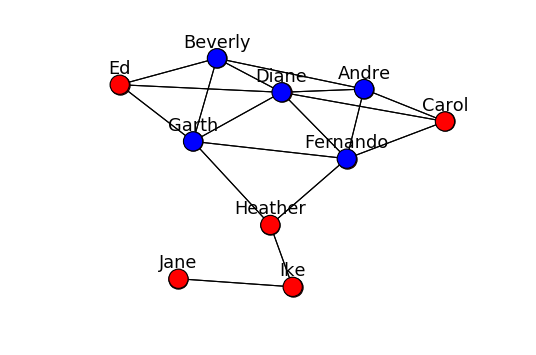

In [89]:
draw_lifted(G)

Out of curiosity, I wish to learn if any of the males in the Krackhardt Kite Graph have formed a social circle. Including only the males (based on name gender assumptions), I find that no three males have formed a Closed Triad, illustrating below.

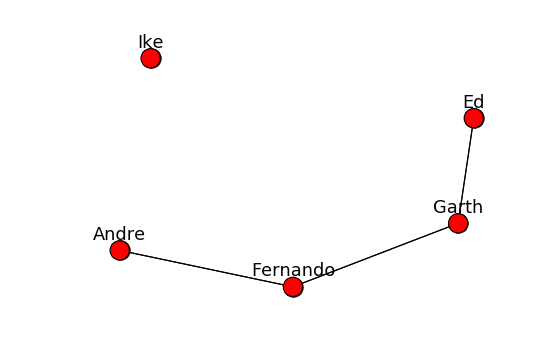

In [111]:
H = nx.Graph()
H.add_edge("Ed","Garth")
H.add_edge("Garth","Fernando")
H.add_edge("Fernando","Andre")
H.add_node("Ike")

draw_lifted(H)
# Without checking here, the same applies to the females. 